# KNN 분류 - 피마 인디언 당뇨병 데이터 셋

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/pima_indians_diabetes.xlsx", categories=['Outcome'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB
None

데이터프레임 상위 5개 행
+----+---------------+-----------+-----------------+-----------------+-----------+-------+----------------------------+-------+-----------+
|    |   Pregnancies |   Glucose |   BloodPressure |   

## #02. 데이터 전처리

### [1] 이전 예제에서 수립한 전처리 전략 재현

1. `0`값을 포함해서는 안되는 변수에 대해 평균으로 대체

#### (1) 정제 대상 필드명

In [9]:
zero_features = ['Pregnancies','Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']
origin[zero_features]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,6,148,72,35,0,33.6
1,1,85,66,29,0,26.6
2,8,183,64,0,0,23.3
3,1,89,66,23,94,28.1
4,0,137,40,35,168,43.1
...,...,...,...,...,...,...
763,10,101,76,48,180,32.9
764,2,122,70,27,0,36.8
765,5,121,72,23,112,26.2
766,1,126,60,0,0,30.1


#### (2) `0`값을 결측치로 대체후 평균으로 다시 치환

In [16]:
df = origin.copy()
df[zero_features] = df[zero_features].replace(0, np.nan)
df1 = my_replace_missing_value(df)

#### (3) 결과 확인

In [18]:
total_count = len(origin)

for feature in zero_features:
    zero_count =origin[origin[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

print("---"*30)

for feature in zero_features:
    zero_count = df1[df1[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))
    

Pregnancies 0 건수는 111, 퍼센트는 14.45 %
Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %
------------------------------------------------------------------------------------------
Pregnancies 0 건수는 0, 퍼센트는 0.00 %
Glucose 0 건수는 0, 퍼센트는 0.00 %
BloodPressure 0 건수는 0, 퍼센트는 0.00 %
SkinThickness 0 건수는 0, 퍼센트는 0.00 %
Insulin 0 건수는 0, 퍼센트는 0.00 %
BMI 0 건수는 0, 퍼센트는 0.00 %


## #03. KNN 분류 적용

### [1] 훈련, 검증 데이터 분리

In [19]:
df1['Outcome'] = df1['Outcome'].astype('int')

x_train, x_test, y_train, y_test =  my_train_test_split(df1, yname='Outcome', test_size =0.2, scalling = False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

### [2] 분류 알고리즘 적용

[교차검증]
+----+-----------+---------------+-----------+-------------------+
|    | metric    |   n_neighbors | weights   |   mean_test_score |
|----+-----------+---------------+-----------+-------------------|
| 11 | manhattan |             7 | distance  |          0.731347 |
| 10 | manhattan |             7 | uniform   |          0.729681 |
|  9 | manhattan |             5 | distance  |          0.726429 |
|  3 | euclidean |             5 | distance  |          0.724857 |
|  8 | manhattan |             5 | uniform   |          0.724777 |
|  2 | euclidean |             5 | uniform   |          0.723231 |
|  5 | euclidean |             7 | distance  |          0.718353 |
|  4 | euclidean |             7 | uniform   |          0.718339 |
|  6 | manhattan |             3 | uniform   |          0.718313 |
|  7 | manhattan |             3 | distance  |            0.7167 |
|  0 | euclidean |             3 | uniform   |          0.706851 |
|  1 | euclidean |             3 | distance  |         

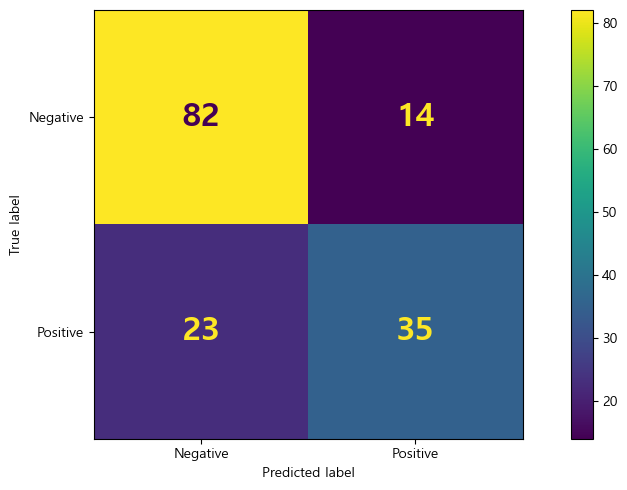

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


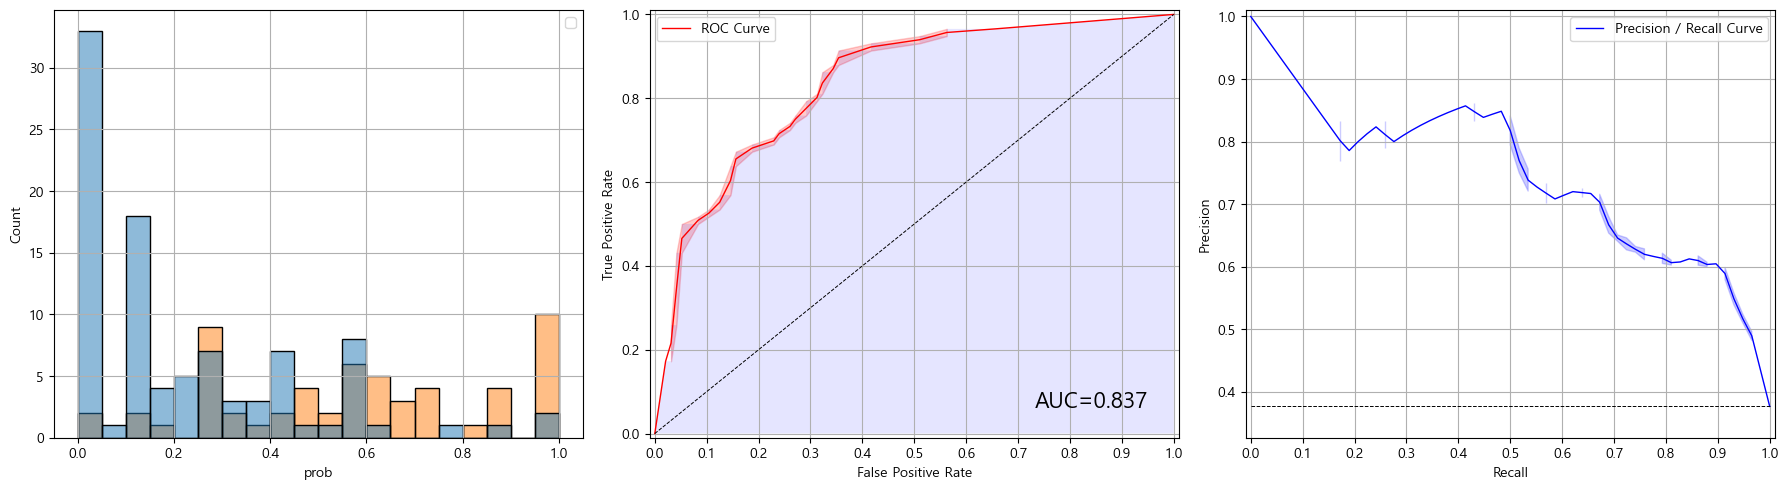


[학습곡선]


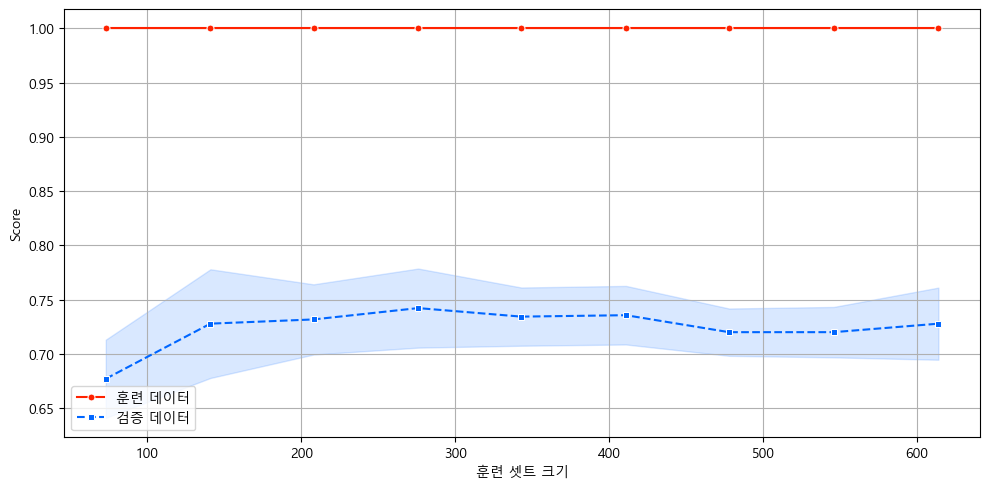

KNeighborsClassifier(metric='manhattan', n_jobs=-1, n_neighbors=7,
                     weights='distance')

In [20]:
my_knn_classification(x_train, y_train, x_test, y_test)